# Exercise 3

In [2]:
# Done by Munther Odeh and Timo Marks
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import gabor_kernel
from skimage.util import img_as_float
from scipy import ndimage as ndi
plt.rcParams.update({'font.size': 16, 'legend.title_fontsize': 16, 'legend.fontsize': 16, "axes.labelsize": 16, "axes.labelpad": 4})


# Image Loading

In [3]:
image_filename = ["python-hero.jpg", "python-code.jpg", "sun-set.jpg", "sun-set-rotated.jpg"]
image_colour = []
image_gray = []
shrink = (slice(0, None, 3), slice(0, None, 3))

for img_file in image_filename:
    img = plt.imread("Images/"+img_file)
    img = img_as_float(img)[shrink]
    image_colour.append(img)
    image_gray.append(rgb2gray(img))
    gray_img = rgb2gray(img)

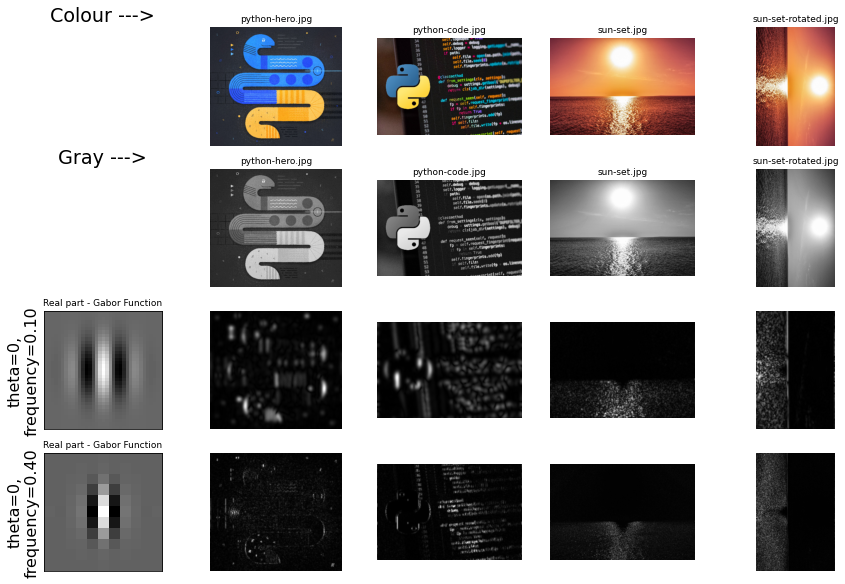

In [8]:
# Does the actual computation 
def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)

results = []
kernel_params = []
for theta in [0]:
    theta = theta / 4. * np.pi
    for frequency in [0.1, 0.4]:
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in image_gray]))

fig, axes = plt.subplots(nrows=len(kernel_params)+2, ncols=len(image_filename)+1, figsize=(15, 10))
# Plot original images
axes[0][0].axis('off') 
axes[0][0].set_title("Colour --->")
for label, img, ax in zip(image_filename, image_colour, axes[0][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

# Plot gray image
axes[1][0].axis('off') 
axes[1][0].set_title("Gray --->")
# From now on plot every picture in gray values
plt.gray()
for label, img, ax in zip(image_filename, image_gray, axes[1][1:]):
    ax.imshow(img)
    ax.set_title(label, fontsize=9)
    ax.axis('off')

# Plot Gabor Function
for label, (gabor, powers), ax_rows in zip(kernel_params, results, axes[2:]):
    ax = ax_rows[0] # First column
    ax.imshow(np.real(gabor))
    ax.set_ylabel(label)
    ax.set_title("Real part - Gabor Function", fontsize=9)
    ax.set_xticks([])
    ax.set_yticks([])

    # Plot Gabor
    for gabor_result, ax in zip(powers, ax_rows[1:]):
        ax.imshow(gabor_result)
        ax.axis('off')

#### The receptive field can be described for example with the Gabor function. With these two used Gabor function you can detect vertical borders in the image. Blurry areas are not detected. See for example the sun in the two sun set images. The sun set images also show, that you can detect the horizon if you rotate the image by 90 degrees. In the correct oriented image the horizon is not detected, because it is horizontal and not vertical. You could also detect the horizon if you rotate the Gabor function by 90 degrees.

#### The Gabor function with the higher frequency creates a sharper output image. The "Code" can be seen better and the ripples are finer. However we get more noise "inside" of the snake in the "python-hero.jpg". 

#### In conclusion, the Gabor function can be used to detect borders of any angle in the image, if you rotate the image or rotate the Gabor function, which would be the more practical approach.